In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [30]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRxp-hsw61ck9cpt5ExZIUhvSGT5zYzoUJl_7xr7YF5qZeazC8393q2taqwkDvMxVirgFDJm1WX3uAC/pub?output=csv')
df.head()
males = df.loc[ df['Gender'] == 'Male'].copy()
females = df.loc[df['Gender'] == 'Female'].copy()
#For more reproducible code, we will define a variable for our data.
data = females["Height"]

In [31]:
#finding the probability of a female having a height between 66.0 and 70.0 inches
low_end = 66.0
high_end = 70.0

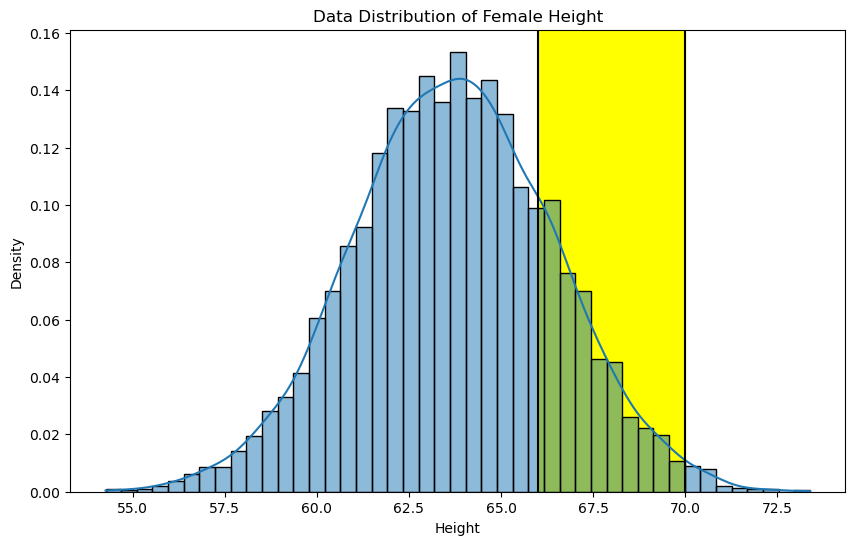

In [33]:
#Plot the probability distribution and visualize the range we are interested in.
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(x=data, stat='density',kde=True)
ax.set_title('Data Distribution of Female Height')
ax.axvline(low_end, color= 'black')
ax.axvline(high_end, color ='black')
ax.axvspan(low_end, high_end, color ='yellow', zorder = 0);

# Mean, STD, Min, Max

In [35]:
#Getting descriptive stats using numpy
mean = np.mean(data)
std = np.std(data)
min = np.min(data)
max = np.max(data)

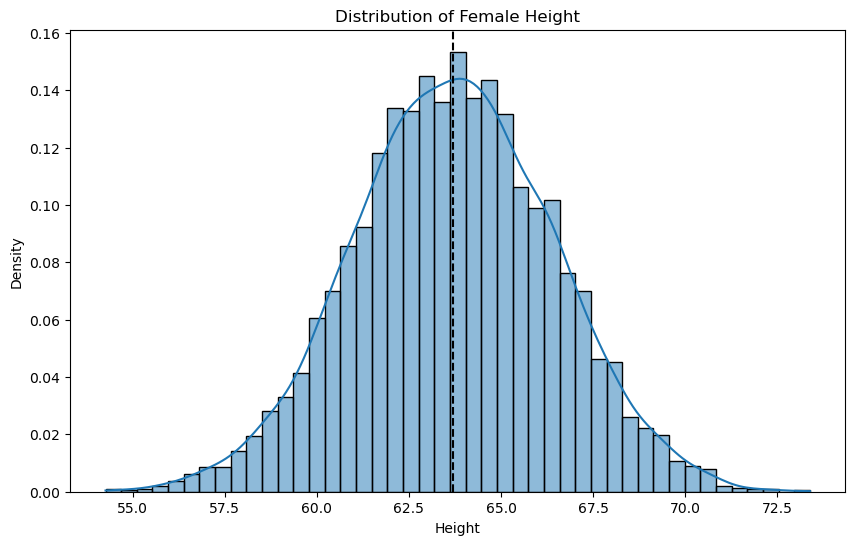

In [36]:
fig, ax = plt.subplots(figsize=(10,6))
#"cumulative = False."  This is the default for sns.histplot(),
sns.histplot(data, stat="density", kde=True, cumulative=False)
ax.set_title("Distribution of Female Height")
ax.axvline(mean, color="k", ls="--");

# Cumulative Distribution Plots (CDF)

First, all of the values are sorted from lowest to highest, and we keep adding one value at a time to our total.



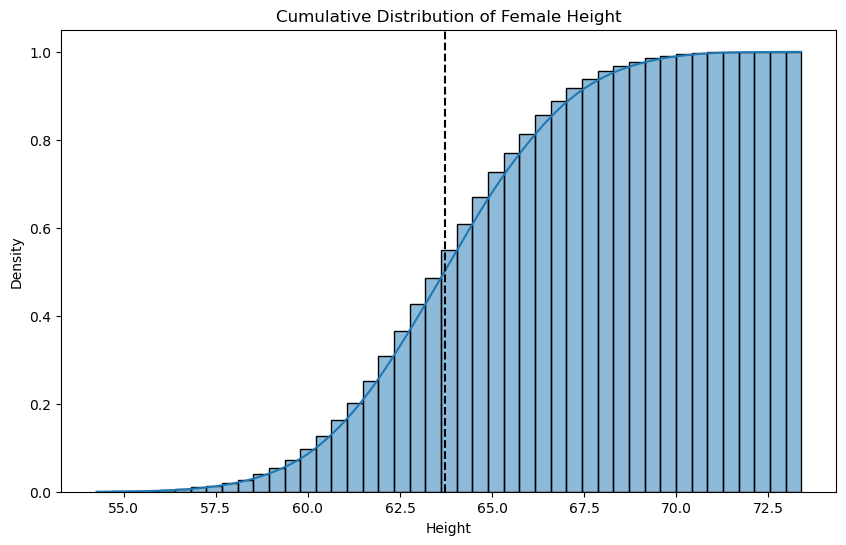

In [39]:
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(data, stat="density", kde=True, cumulative=True)
ax.set_title("Cumulative Distribution of Female Height")
ax.axvline(mean, color="k", ls="--");

# pdf and cdf

In [40]:
x_range = np.linspace(min, max, 1000)

When using creating the pdf function/curve for any normal distribution, we will use `stats.norm.pdf`. It accepts the following parameters:

* x: range and spacing of x 
* loc: the mean (defaults to 0)
* scale: the standard deviation. (default =1 )

In [41]:
pdf = stats.norm.pdf(x_range, loc=mean, scale=std)

## Normal pdf


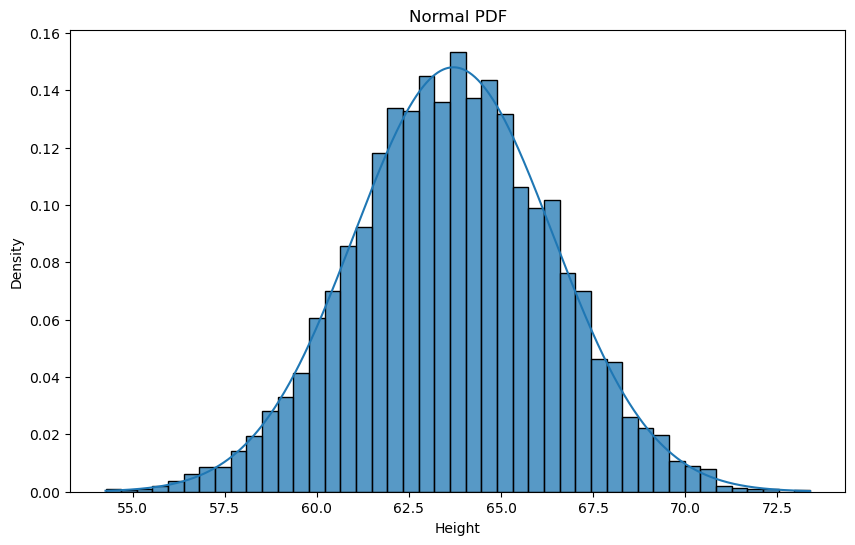

In [42]:
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(data, stat="density")
ax.plot(x_range, pdf)
ax.set_title("Normal PDF");

## Normal CDF (Cumulative Distribution Function)

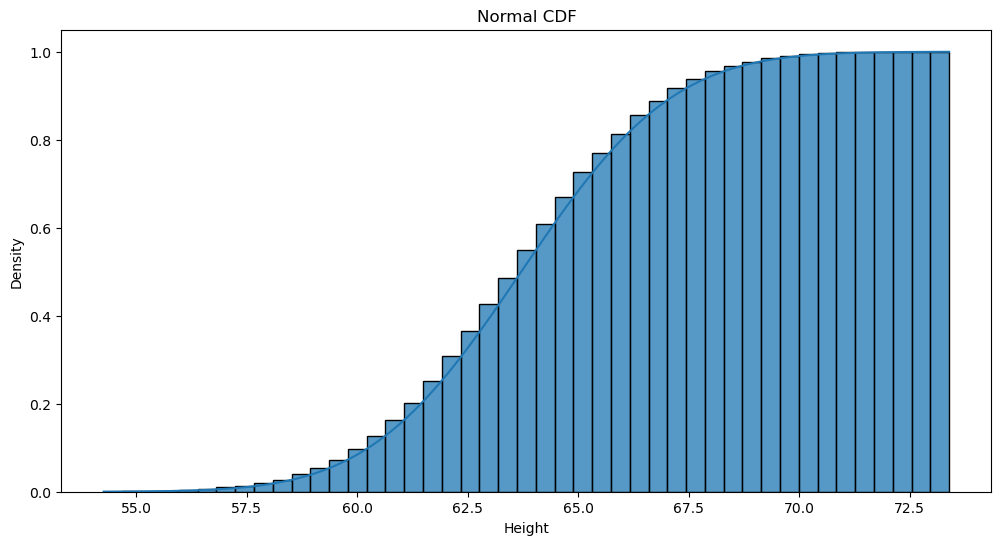

In [43]:
cdf = stats.norm.cdf(x_range, loc=mean, scale=std)
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(data, stat="density", cumulative=True)
ax.plot(x_range, cdf)
ax.set_title("Normal CDF");

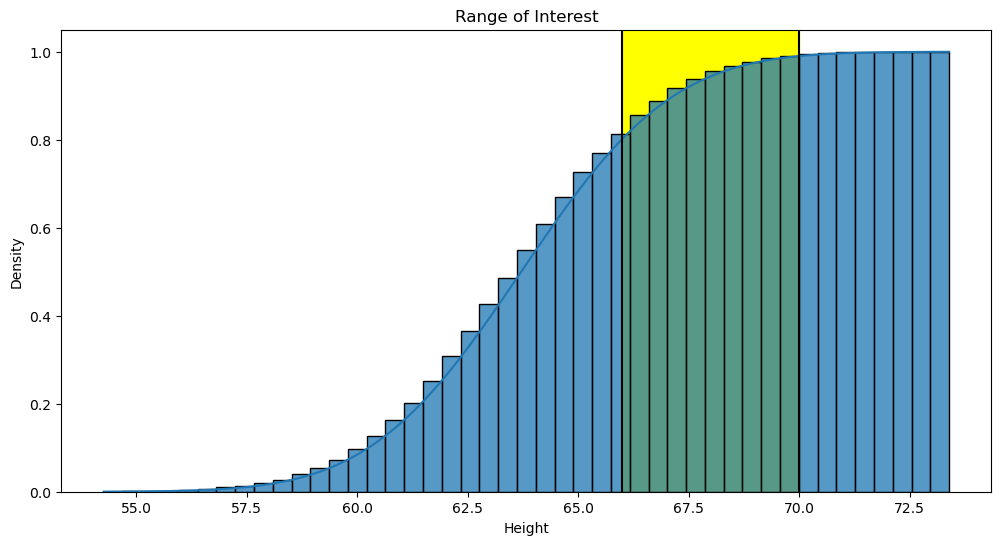

In [46]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(data, stat="density", cumulative=True)
ax.plot(x_range, cdf)
ax.axvline(low_end, color="black")
ax.axvline(high_end, color="black")
ax.axvspan(low_end, high_end, color="yellow", zorder=0)
ax.set_title("Range of Interest");

We found that there is a .188 probability (or an 18.8% chance) of a female having a height between 66 and 70 inches. vv

In [48]:
## we subtract to find the probability of a value occurring in the range
stats.norm.cdf(high_end, loc=mean, scale=std) - stats.norm.cdf(low_end, loc=mean, scale=std)

0.1878921154347699

## Calculate the probability of the height being less than 65 inches

In [49]:
stats.norm.cdf(65, loc=mean, scale=std)

0.6840089832900467

## calculate the probability of the height 65 inches or greater

(subtract from 1 aka 100%)

In [50]:
1 - stats.norm.cdf(65, loc=mean, scale=std)

0.31599101670995333

# cdf allows us to calculate the probability of any range of values in our distribution